## Importation des Bibliothèques

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mne

## Définition des variables

In [3]:
Fe=200
dt=1/Fe
t = np.arange(1000)*dt

In [53]:
# Signal en somme de sinus

x = np.sin(2*np.pi*2*t) + np.sin(2*np.pi*5*t)

In [5]:
# Signal représentant du bruit blanc

mean = 0
std = 1 
num_samples = 1000
x = np.random.normal(mean, std, size=num_samples)

In [49]:
# Importation d'un Signal EEG

file_path = "/Users/ewen/mne_data/physionet-sleep-data/SC4001E0-PSG.edf"          # Charger un fichier EEG au format EDF
raw = mne.io.read_raw_edf(file_path, preload=True)

print(raw.info)                                      # Afficher des informations sur le signal

data, times = raw[:]                                 # Accéder aux données sous forme de numpy array

print("Données EEG :", data)                         # Afficher les premières valeurs
print("Temps :", times)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2795039353.py, line 16)

## Calcul de la fréquence et transformation dans le domaine de Fourrier

In [7]:
sp = np.fft.fft(x)
freq = np.fft.fftfreq(x.size,dt)

## Définition des fonctions

In [9]:
#Fonction : Filtre passe bande de fréquence de coupure fcoup1(borne inf), fcoup2(borne sup)

def passe_bande(fcoup1,fcoup2):
    filtre=[0]*len(freq)
    for i in range(0,len(freq)):
        if fcoup1<= freq[i] and freq[i]<=fcoup2: filtre[i]=1
    return filtre

In [11]:
# Fonction d'affichage des coubres

def affiches_courbes(Signals):
    for i in range(0,len(Signals)):
        plt.subplot(len(Signals),1,i+1)                                      # Positionne la coubre en ième position sur le plot
        plt.plot(Signals[i]["abscisse"],Signals[i]["signal"])                # Assigne à la coubre une plage de donnée en abscisse et une en ordonnée
        plt.xlim(Signals[i]["borne_inf"],Signals[i]["borne_sup"])   
        plt.gcf().subplots_adjust(left = 0.2, bottom = 0.2, right = 0.9, top = 0.9, wspace = 0.5, hspace = 0.5)# Définie les limites de la plage en abscisse
    plt.show()

In [13]:
# Fonction effectuant le traitement du signal et retournant une liste avec le signal dans toutes ses étapes

def traitement_signal(signal, fcoup1,fcoup2):
    Signals=[]
    Signal = {"signal" : signal, "abscisse" : t, "borne_inf" : 0, "borne_sup" : None}
    fft = {"signal" : np.abs(np.fft.fft(signal.real)), "abscisse" : np.fft.fftfreq(signal.size,dt), "borne_inf" : 0, "borne_sup" : 200}
    Filtre = {"signal" : passe_bande(fcoup1,fcoup2), "abscisse" : np.fft.fftfreq(signal.size,dt), "borne_inf" : 0, "borne_sup" : 100}
    Fft_filtré = {"signal" : np.abs((signal*passe_bande(fcoup1,fcoup2)).real), "abscisse" : np.fft.fftfreq(signal.size,dt), "borne_inf" : 0, "borne_sup" : 200}
    Signal_filtré = {"signal" : np.fft.ifft((sp*passe_bande(fcoup1,fcoup2))), "abscisse" : np.fft.fftfreq(signal.size,dt), "borne_inf" : 0, "borne_sup" : None}
    Signals.append(Signal)
    Signals.append(fft)
    Signals.append(Filtre)
    Signals.append(Fft_filtré)
    Signals.append(Signal_filtré)

    affiches_courbes(Signals)

## Traitement du signal 

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


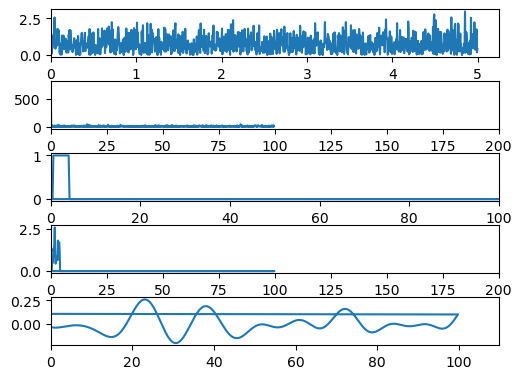

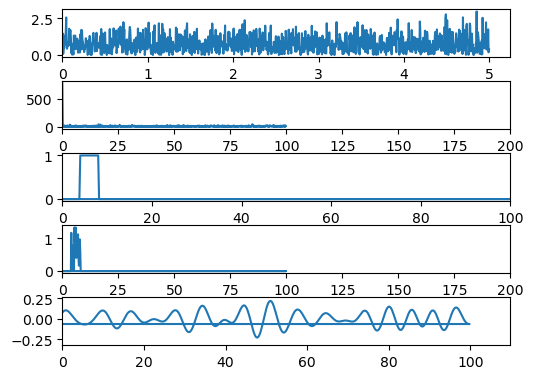

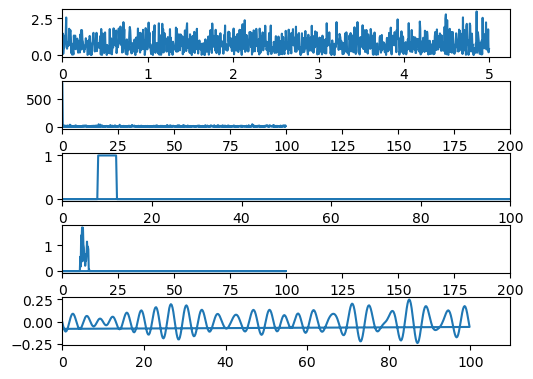

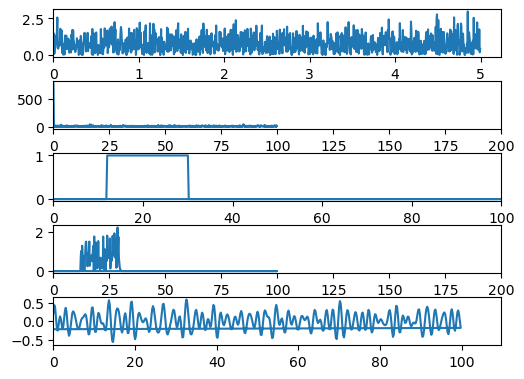

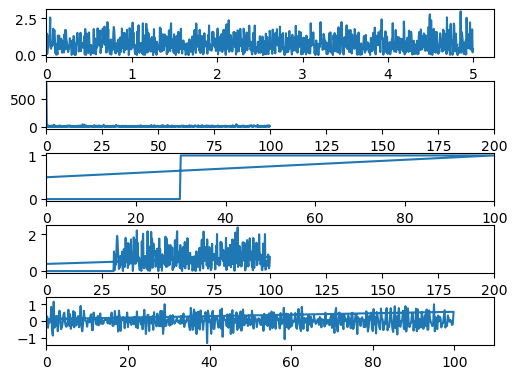

In [15]:
clean_x = np.abs(x-x*passe_bande(49.9,50.1)) #50Hz

traitement_signal(clean_x,0.5,4) #Delta

traitement_signal(clean_x,4,8) #Theta

traitement_signal(clean_x,8,12) #Alpha

traitement_signal(clean_x,12,30) #Beta

traitement_signal(clean_x,30,100) #Gamma

<function matplotlib.pyplot.show(close=None, block=None)>

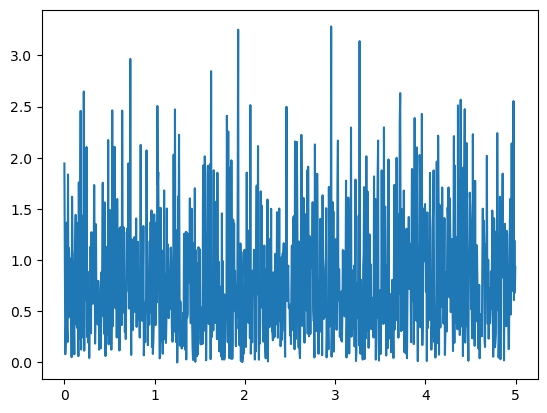

In [120]:
plt.plot(t,clean_x)
plt.show